In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('car price.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# Data Cleaning

In [3]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df['name'].isnull().sum()

0

In [6]:
df['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
2                  Maruti Suzuki Alto 800 Vxi
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
                        ...                  
887                                        Ta
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
890                  Honda Amaze 1.2 E i VTEC
891                 Chevrolet Sail 1.2 LT ABS
Name: name, Length: 892, dtype: object>

# changing the data 

In [7]:
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].str.replace(' ','')
df=df[df['Price']!='Ask For Price']
df=df[df['Price']!='AskForPrice']
df['Price']=df['Price'].astype('int32')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 43.5+ KB


,Price
count,8.570000e+02
mean,4.046885e+05
std,4.655365e+05
min,3.000000e+04
25%,1.750000e+05
50%,2.999990e+05
75%,4.850000e+05
max,8.500003e+06


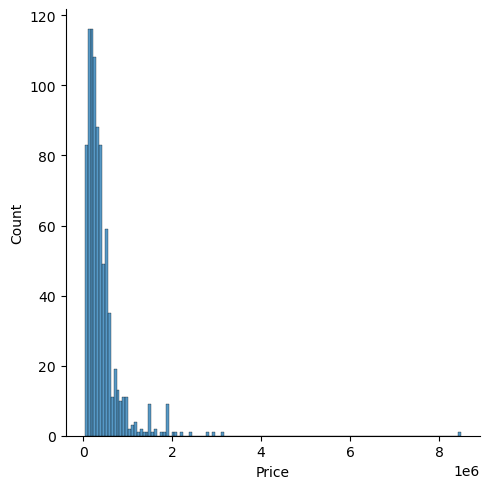

In [8]:
sns.displot(df['Price'])
df.describe()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 43.5+ KB


In [10]:
df['kms_driven'].isnull().sum()
df['kms_driven']=df['kms_driven'].apply(str).str.replace(',','')
df['kms_driven']=df['kms_driven'].apply(str).str.replace('kms','')
df=df[df['kms_driven']!='Petrol']
df=df[df['kms_driven']!='nan']
df['kms_driven']=df['kms_driven'].astype('int32')
df.info()
df['kms_driven'].unique()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    object
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


,Price,kms_driven
count,8.170000e+02,817.000000
mean,4.115503e+05,46250.714810
std,4.749173e+05,34283.745254
min,3.000000e+04,0.000000
25%,1.750000e+05,27000.000000
50%,2.999990e+05,41000.000000
75%,4.900000e+05,56758.000000
max,8.500003e+06,400000.000000


In [11]:
# fuel type
df['fuel_type'].unique()
# df['fuel_type'].isnull().sum()
df.dropna(inplace=True)
df['fuel_type'].isnull().sum()
df=df[df['fuel_type']!='LPG']
df.info()
df['fuel_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    object
 3   Price       814 non-null    int32 
 4   kms_driven  814 non-null    int32 
 5   fuel_type   814 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


Petrol    428
Diesel    386
Name: fuel_type, dtype: int64

In [12]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [13]:
#year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    object
 3   Price       814 non-null    int32 
 4   kms_driven  814 non-null    int32 
 5   fuel_type   814 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [14]:
df['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [15]:
df['year']=df['year'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    int32 
 3   Price       814 non-null    int32 
 4   kms_driven  814 non-null    int32 
 5   fuel_type   814 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.0+ KB


In [16]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [17]:
#company
df['company'].unique()
df['company'].value_counts()

Maruti        219
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

In [18]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [19]:
#name
df['model']=df['name'].str.split(" ").str.slice(0,3).str.join(" ")

In [20]:
# reseting the index 
df=df.reset_index(drop=True)
df

,name,company,year,Price,kms_driven,fuel_type,model
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Ford Figo,Ford,2012,175000,41000,Diesel,Ford Figo
...,...,...,...,...,...,...,...
809,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
810,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel,Tata Indica V2
811,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis
812,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel,Tata Zest XM


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    int32 
 3   Price       814 non-null    int32 
 4   kms_driven  814 non-null    int32 
 5   fuel_type   814 non-null    object
 6   model       814 non-null    object
dtypes: int32(3), object(4)
memory usage: 35.1+ KB


In [22]:
df.drop(columns=['name'],inplace=True)
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Ford,2012,175000,41000,Diesel,Ford Figo
...,...,...,...,...,...,...
809,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
810,Tata,2009,110000,30000,Diesel,Tata Indica V2
811,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis
812,Tata,2018,260000,27000,Diesel,Tata Zest XM


 # EDA

# Univariate analysis

In [23]:
df['model'].unique()
df['model'].value_counts()

Maruti Suzuki Swift            51
Maruti Suzuki Alto             42
Maruti Suzuki Wagon            28
Maruti Suzuki Ertiga           16
Hyundai Santro Xing            15
                               ..
Mercedes Benz A                 1
Tata Manza ELAN                 1
Volkswagen Polo Comfortline     1
Nissan Sunny                    1
Tata Zest XM                    1
Name: model, Length: 254, dtype: int64

<Axes: >

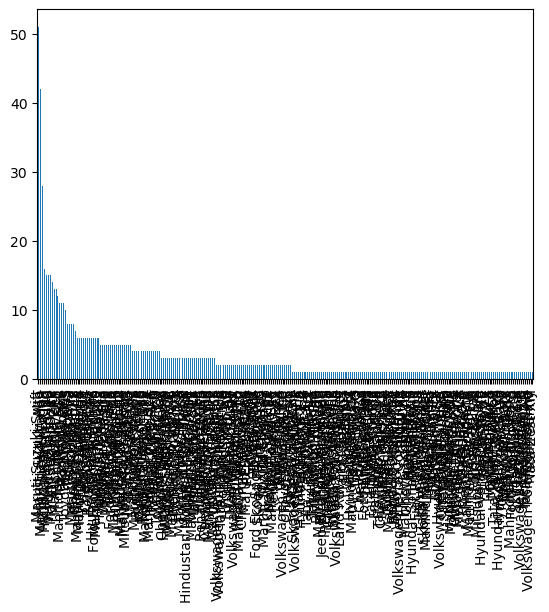

In [24]:
df['model'].value_counts().plot(kind='bar')

In [25]:
# Calculate value counts for Column1
value_counts = df['model'].value_counts()

# Identify categories with value counts less than 10
categories_to_drop = value_counts[value_counts < 3].index

# Drop rows with categories having value counts less than 10
df = df[~df['model'].isin(categories_to_drop)]

# Reset the index if needed
df.reset_index(drop=True, inplace=True)
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Hyundai,2013,190000,25000,Petrol,Hyundai Eon
...,...,...,...,...,...,...
607,Maruti,2009,250000,51000,Diesel,Maruti Suzuki Swift
608,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
609,Tata,2009,110000,30000,Diesel,Tata Indica V2
610,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis


<Axes: >

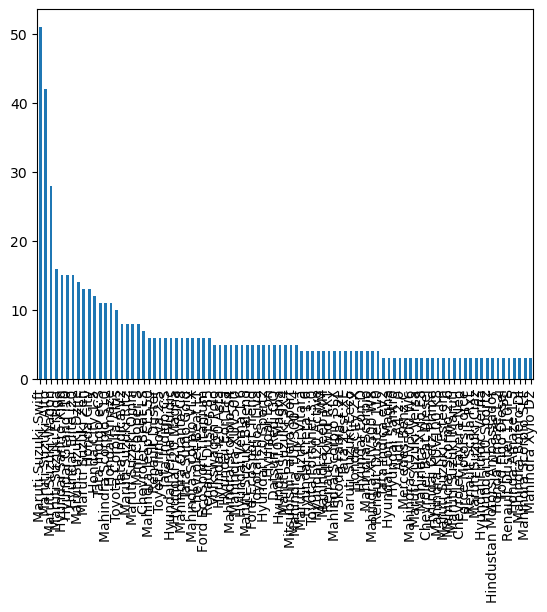

In [26]:
df['model'].value_counts().plot(kind='bar')

In [27]:
df['model'].value_counts()

Maruti Suzuki Swift     51
Maruti Suzuki Alto      42
Maruti Suzuki Wagon     28
Maruti Suzuki Ertiga    16
Hyundai Santro Xing     15
                        ..
Renault Duster 110PS     3
Honda Amaze 1.5          3
Mahindra Bolero DI       3
Mahindra Scorpio SLE     3
Mahindra Xylo D2         3
Name: model, Length: 91, dtype: int64

<Axes: >

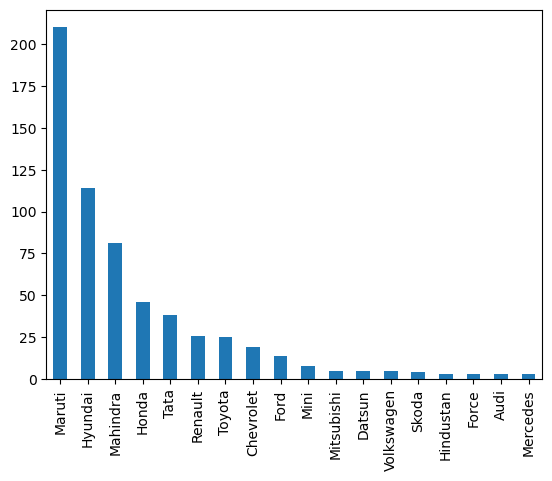

In [28]:
df['company'].value_counts().plot(kind='bar')

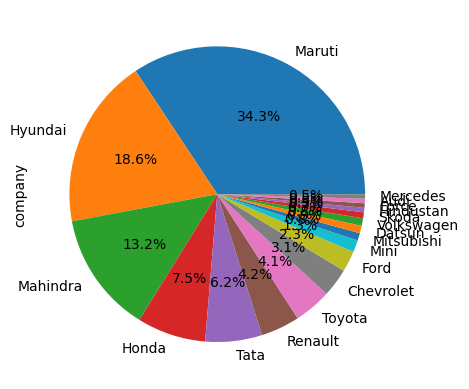

In [29]:
df['company'].value_counts().plot(kind='pie', autopct='%1.1f%%' )
plt.xticks(rotation='vertical')
plt.show()

In [30]:
df


,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Hyundai,2013,190000,25000,Petrol,Hyundai Eon
...,...,...,...,...,...,...
607,Maruti,2009,250000,51000,Diesel,Maruti Suzuki Swift
608,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
609,Tata,2009,110000,30000,Diesel,Tata Indica V2
610,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis


<Axes: >

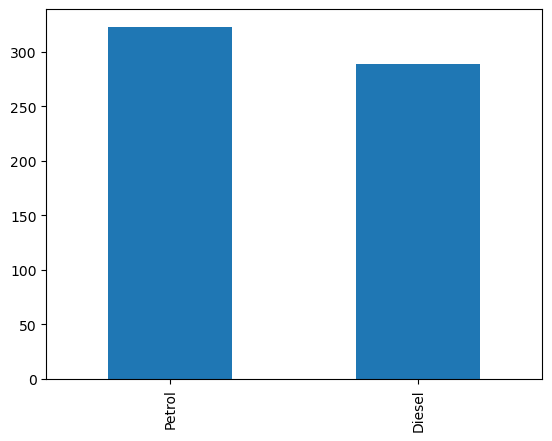

In [31]:
df['fuel_type'].value_counts().plot(kind='bar')

<Axes: ylabel='fuel_type'>

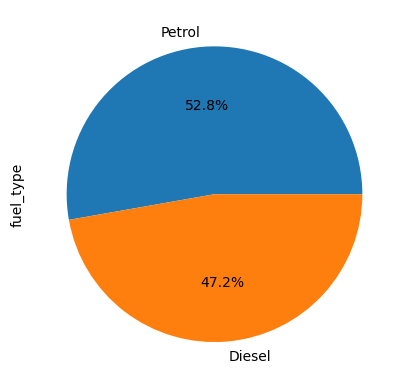

In [32]:
df['fuel_type'].value_counts().plot(kind='pie' , autopct='%1.1f%%')

<Axes: >

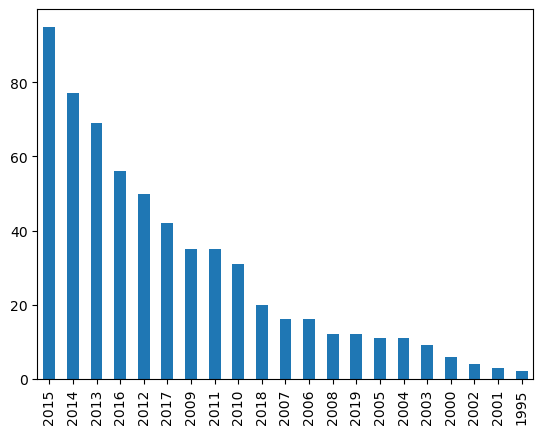

In [33]:
df['year'].value_counts().plot(kind='bar')

<Axes: ylabel='year'>

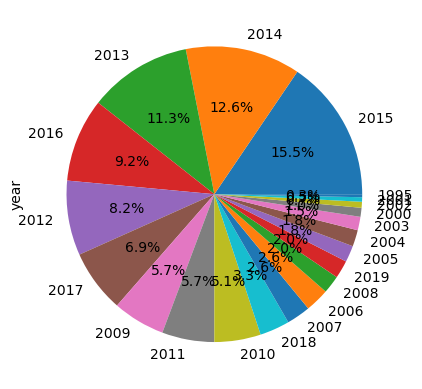

In [34]:
df['year'].value_counts().plot(kind='pie' , autopct='%1.1f%%')

# Bivariate analysis

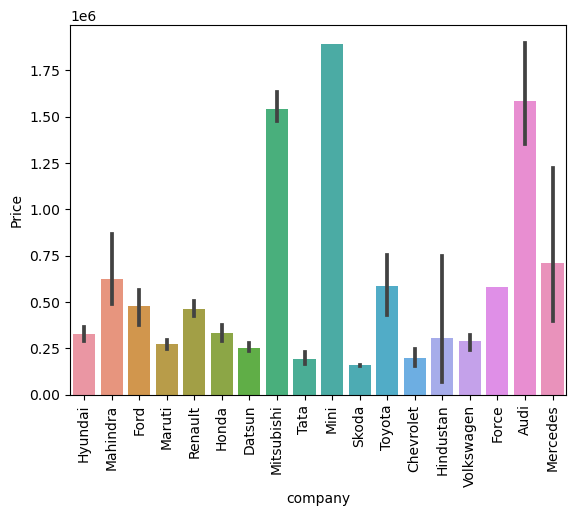

In [35]:
# between price and company
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

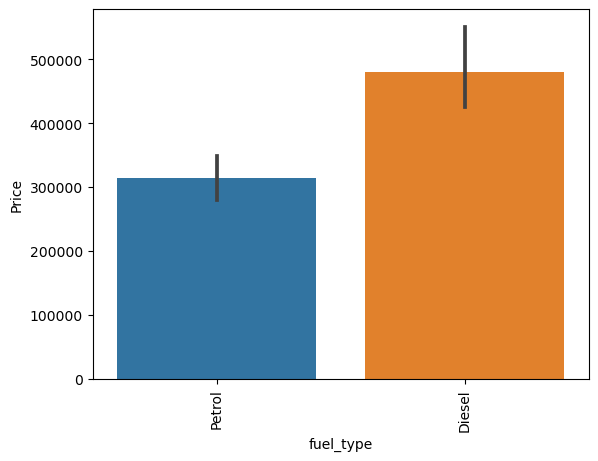

In [36]:
# between fueltype and price
sns.barplot(x=df['fuel_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

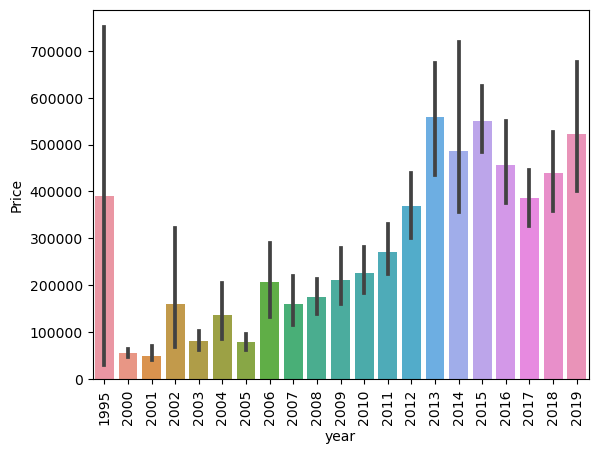

In [37]:
# between year and price 
sns.barplot(x=df['year'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Hyundai,2013,190000,25000,Petrol,Hyundai Eon
...,...,...,...,...,...,...
607,Maruti,2009,250000,51000,Diesel,Maruti Suzuki Swift
608,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
609,Tata,2009,110000,30000,Diesel,Tata Indica V2
610,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis


In [39]:
# corelation
new_df=df.drop(columns=['company','model','fuel_type'])
new_df
new_df.corr()['Price']

year          0.259913
Price         1.000000
kms_driven   -0.068089
Name: Price, dtype: float64

In [40]:
new_df.corr()

,year,Price,kms_driven
year,1.000000,0.259913,-0.204006
Price,0.259913,1.000000,-0.068089
kms_driven,-0.204006,-0.068089,1.000000


<Axes: >

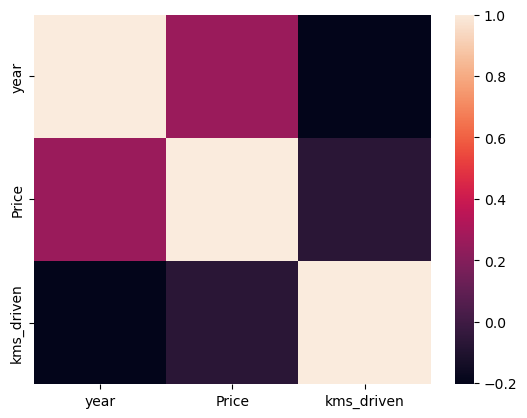

In [41]:
sns.heatmap(new_df.corr())

# outlier detection

<Axes: xlabel='year'>

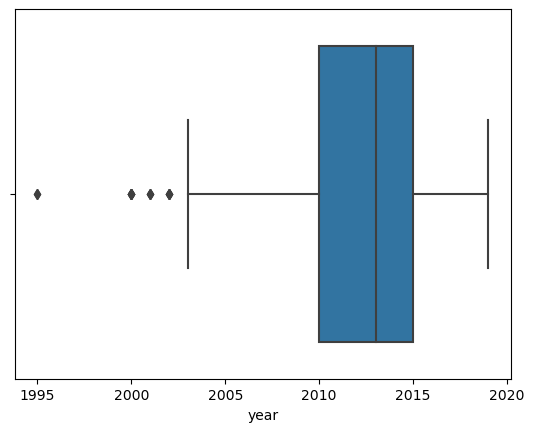

In [42]:
sns.boxplot(x=df['year'])

<Axes: xlabel='kms_driven'>

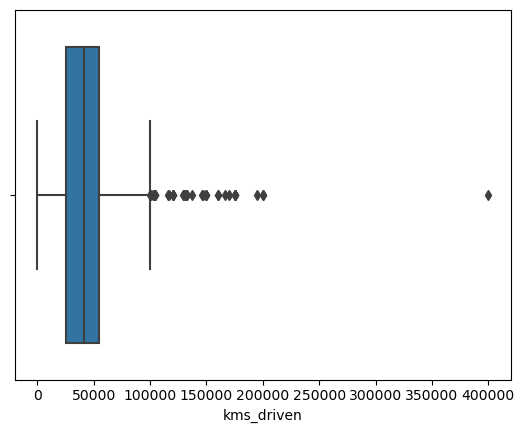

In [43]:
sns.boxplot(x=df['kms_driven'])

In [44]:
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Hyundai,2013,190000,25000,Petrol,Hyundai Eon
...,...,...,...,...,...,...
607,Maruti,2009,250000,51000,Diesel,Maruti Suzuki Swift
608,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
609,Tata,2009,110000,30000,Diesel,Tata Indica V2
610,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis


C:\Users\DELL\AppData\Local\Temp\ipykernel_16404\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

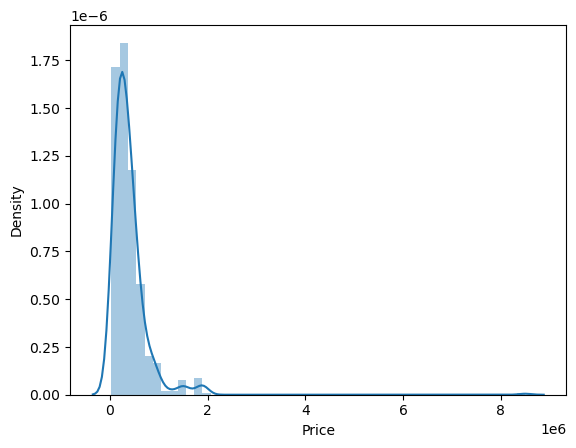

In [45]:
sns.distplot(df['Price'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_16404\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

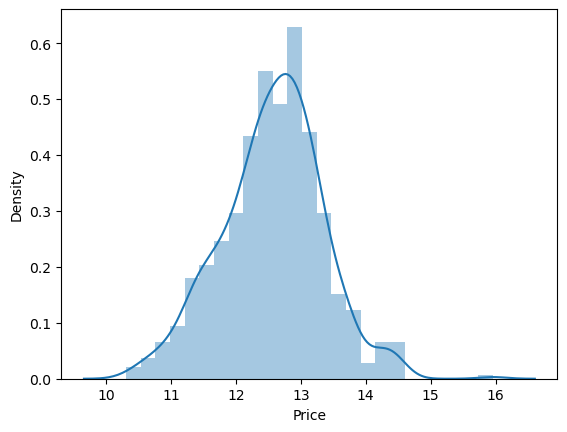

In [46]:
sns.distplot(np.log(df['Price']))

# model creation

In [47]:
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Hyundai,2013,190000,25000,Petrol,Hyundai Eon
...,...,...,...,...,...,...
607,Maruti,2009,250000,51000,Diesel,Maruti Suzuki Swift
608,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
609,Tata,2009,110000,30000,Diesel,Tata Indica V2
610,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis


In [48]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])
x
y

0      11.289782
1      12.959844
2      12.691580
3      13.262125
4      12.154779
         ...    
607    12.429216
608    12.506177
609    11.608236
610    12.611538
611    12.873902
Name: Price, Length: 612, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15)


In [50]:
x_train.shape

(520, 5)

In [51]:
x_test.shape

(92, 5)

In [52]:
y_train.shape

(520,)

In [53]:
y_test.shape

(92,)

In [54]:
# reshaping y column
y_train= np.array(y_train).reshape(-1,1)
y_train.shape

(520, 1)

In [55]:
y_test=np.array(y_test).reshape(-1,1)
y_test.shape

(92, 1)

In [56]:
x_train

,company,year,kms_driven,fuel_type,model
468,Ford,2014,47000,Petrol,Ford EcoSport Trend
268,Datsun,2017,22000,Petrol,Datsun Redi GO
603,Hyundai,2018,2100,Petrol,Hyundai Elite i20
215,Tata,2016,175430,Diesel,Tata Indigo eCS
43,Maruti,2013,39000,Petrol,Maruti Suzuki Wagon
...,...,...,...,...,...
456,Toyota,2012,85000,Diesel,Toyota Etios Liva
400,Hyundai,2009,20000,Petrol,Hyundai Getz Prime
479,Maruti,2017,41800,Diesel,Maruti Suzuki Swift
571,Maruti,2017,12500,Petrol,Maruti Suzuki Alto


# column transformation

In [57]:
from sklearn.preprocessing import OrdinalEncoder
# oe=OrdinalEncoder(categories=[['Petrol','Diesel']])
# oe.fit_transform(np.array(x_train['fuel_type']).reshape(-1,1))
# oe.fit_transform(np.array(x_test['fuel_type']).reshape(-1,1))
# x_test
x_train['fuel_type']=x_train['fuel_type'].apply(lambda x: 0 if x=='Petrol' else 1)
x_test['fuel_type']=x_test['fuel_type'].apply(lambda x: 0 if x=='Petrol' else 1)


In [58]:
x_test['fuel_type'].value_counts()

0    52
1    40
Name: fuel_type, dtype: int64

In [59]:
x_train

,company,year,kms_driven,fuel_type,model
468,Ford,2014,47000,0,Ford EcoSport Trend
268,Datsun,2017,22000,0,Datsun Redi GO
603,Hyundai,2018,2100,0,Hyundai Elite i20
215,Tata,2016,175430,1,Tata Indigo eCS
43,Maruti,2013,39000,0,Maruti Suzuki Wagon
...,...,...,...,...,...
456,Toyota,2012,85000,1,Toyota Etios Liva
400,Hyundai,2009,20000,0,Hyundai Getz Prime
479,Maruti,2017,41800,1,Maruti Suzuki Swift
571,Maruti,2017,12500,0,Maruti Suzuki Alto


# pipeline 

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

# Linear Regression

In [65]:
# from sklearn.linear_model import LinearRegression
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4])
# ],remainder='passthrough')
# step2=LinearRegression()
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# Ridge

In [66]:
# from sklearn.linear_model import Ridge
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4])
# ],remainder='passthrough')
# step2=Ridge(alpha=1.5)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# Lasso

In [67]:
# from sklearn.linear_model import Lasso
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4])
# ],remainder='passthrough')

# step2=Lasso(alpha=1)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# decision tree

In [68]:
# from sklearn.tree import DecisionTreeRegressor
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4])
# ], remainder='passthrough')

# step2=DecisionTreeRegressor()
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# Random forest

In [69]:
# from sklearn.ensemble import RandomForestRegressor
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4])
# ],remainder='passthrough')

# step2=RandomForestRegressor(n_estimators=150, max_features='log2')
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# extra tree

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
step1=ColumnTransformer([
    ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,4])
],remainder='passthrough')
step2=ExtraTreesRegressor(n_estimators=150,max_features='log2')
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


# Ada boost

In [71]:
# from sklearn.ensemble import AdaBoostRegressor
# step1=ColumnTransformer([
#     ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,4])
# ],remainder='passthrough')
# step2=AdaBoostRegressor(learning_rate=.3)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# Gradient boost

In [72]:
# from sklearn.ensemble import GradientBoostingRegressor
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4])
# ])
# step2=GradientBoostingRegressor(learning_rate=.5,n_estimators=300)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(x_train,y_train)
# y_pred=pipe.predict(x_test)

# accuracy

In [73]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.22541678921427996
0.6981100256440884


# exporting model


In [74]:
import pickle as pkl
pkl.dump(pipe,open('pipe.pkl','wb'))
pkl.dump(df,open('df.pkl','wb'))

In [75]:
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Hyundai Santro Xing
1,Mahindra,2006,425000,40,Diesel,Mahindra Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Hyundai Grand i10
3,Ford,2014,575000,36000,Diesel,Ford EcoSport Titanium
4,Hyundai,2013,190000,25000,Petrol,Hyundai Eon
...,...,...,...,...,...,...
607,Maruti,2009,250000,51000,Diesel,Maruti Suzuki Swift
608,Maruti,2011,270000,50000,Petrol,Maruti Suzuki Ritz
609,Tata,2009,110000,30000,Diesel,Tata Indica V2
610,Toyota,2009,300000,132000,Petrol,Toyota Corolla Altis


In [76]:
np.exp(pipe.predict(pd.DataFrame([['Hyundai',2007,45000,0,'Hyundai Santro Xing']],columns=['company','year','kms_driven','fuel_type','model'])))

array([80000.])